In [1]:
import pandas
import seaborn
import pytry

In [2]:
df_neurons = pandas.DataFrame(pytry.read('vary_neurons_childchild'))
df_neurons['mean_aim'] = df_neurons[['mean_aim1', 'mean_aim2', 'mean_aim3', 'mean_aim4', 'mean_aim5', 'mean_aim6', 'mean_aim7', 
                             'mean_aim8', 'mean_aim9', 'mean_aim10', 'mean_aim11', 'mean_aim12', 'mean_aim13', 'mean_aim14']].mean(axis=1)
df_neurons['mean_goal'] = df_neurons[['mean_goal1', 'mean_goal2', 'mean_goal3', 'mean_goal4', 'mean_goal5', 'mean_goal6']].mean(axis=1)
df_neurons['mean_noplay'] = df_neurons[['mean_noplay1', 'mean_noplay2', 'mean_noplay3', 'mean_noplay4', 'mean_noplay5', 'mean_noplay6',
                                       'mean_noplay7', 'mean_noplay8']].mean(axis=1)
df_neurons1 = df_neurons[['n_neurons','mean_goal', 'mean_aim', 'mean_noplay']]
df_neurons1

,n_neurons,mean_goal,mean_aim,mean_noplay
0,200,-0.408094,-0.347070,-0.484977
1,500,-0.374874,-0.352462,-0.415370
2,1000,-0.325103,-0.351396,-0.328226
3,2000,-0.294100,-0.301490,-0.302137
4,5000,-0.185763,-0.066869,-0.169342
5,200,-0.147246,-0.239941,-0.240648
6,500,-0.156954,-0.268096,-0.284182
7,1000,-0.104226,-0.393739,-0.253070
8,2000,-0.102161,-0.296194,-0.161719
9,5000,-0.088898,-0.265904,-0.167989


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


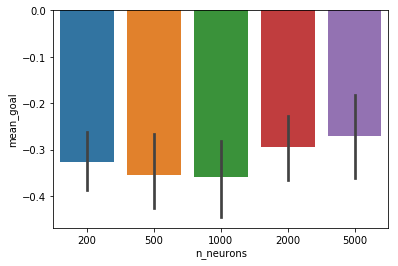

In [3]:
seaborn.barplot('n_neurons', 'mean_goal', data=df_neurons1)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


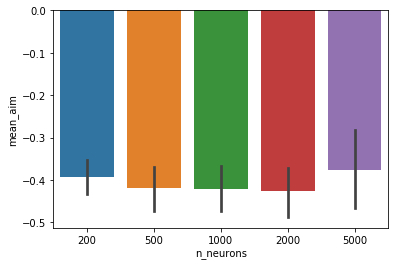

In [4]:
seaborn.barplot('n_neurons', 'mean_aim', data=df_neurons1)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


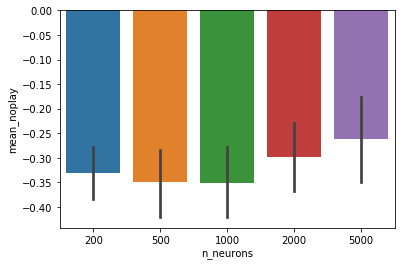

In [5]:
seaborn.barplot('n_neurons', 'mean_noplay', data=df_neurons1)

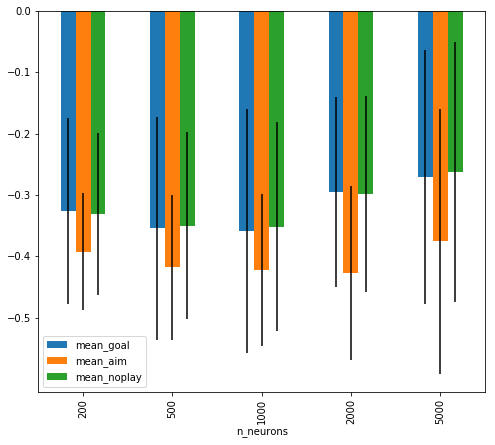

In [6]:
groups = df_neurons1.groupby(['n_neurons']).mean()
errors = df_neurons1.groupby(['n_neurons']).std()
groups.plot(kind='bar', yerr=errors, figsize=(8,7), yticks=(0, -0.1, -0.2, -0.3, -0.4, -0.5))

In [7]:
df_neurons_cr = pandas.DataFrame(pytry.read('vary_neurons_child-robot'))
df_neurons_cr['mean_aim'] = df_neurons_cr[['mean_aim1', 'mean_aim2', 'mean_aim3', 'mean_aim4', 'mean_aim5', 'mean_aim6', 'mean_aim7', 
                             'mean_aim8', 'mean_aim9', 'mean_aim10', 'mean_aim11']].mean(axis=1)
df_neurons_cr['mean_goal'] = df_neurons_cr[['mean_goal1', 'mean_goal2', 'mean_goal3', 'mean_goal4', 'mean_goal5']].mean(axis=1)
df_neurons_cr['mean_noplay'] = df_neurons_cr[['mean_noplay1', 'mean_noplay2', 'mean_noplay3', 'mean_noplay4', 'mean_noplay5', 'mean_noplay6',
                                       'mean_noplay7']].mean(axis=1)
df_neurons_cr1 = df_neurons_cr[['n_neurons','mean_goal', 'mean_aim', 'mean_noplay']]
df_neurons_cr1

,n_neurons,mean_goal,mean_aim,mean_noplay
0,200,-0.519141,-0.370908,-0.561863
1,500,-0.688538,-0.399454,-0.824964
2,1000,-0.880697,-0.474354,-0.998316
3,2000,-1.089056,-0.741122,-1.242157
4,5000,-1.292771,-0.877016,-1.573607
5,200,-0.520568,-0.445272,-0.841537
6,500,-0.580112,-0.543181,-0.864847
7,1000,-0.633663,-0.590958,-0.977373
8,2000,-0.725599,-0.636253,-1.054800
9,5000,-0.970028,-0.847056,-1.266683


C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


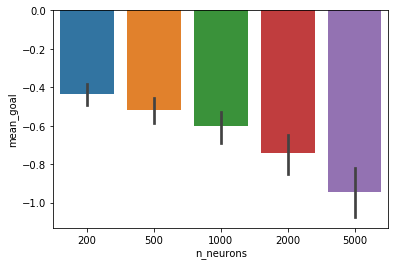

In [8]:
seaborn.barplot('n_neurons', 'mean_goal', data=df_neurons_cr1)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


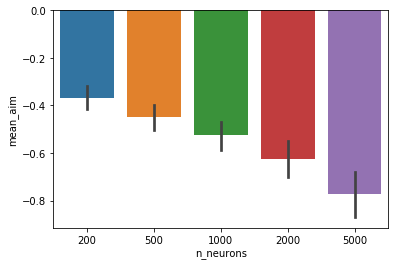

In [9]:
seaborn.barplot('n_neurons', 'mean_aim', data=df_neurons_cr1)

C:\Users\mbartlett2\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


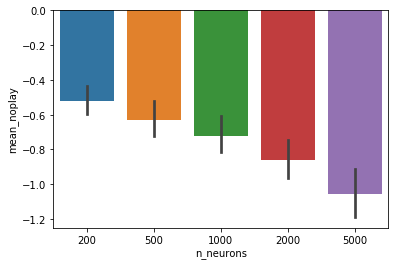

In [10]:
seaborn.barplot('n_neurons', 'mean_noplay', data=df_neurons_cr1)

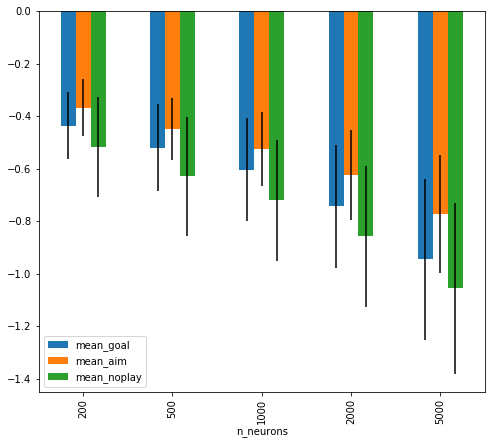

In [12]:
groups = df_neurons_cr1.groupby(['n_neurons']).mean()
errors = df_neurons_cr1.groupby(['n_neurons']).std()
groups.plot(kind='bar', yerr=errors, figsize=(8,7))